# **Importar las librerías**

In [ ]:
import zipfile
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# **Descargar las imágenes**

In [ ]:
!wget --no-check-certificate \
    "https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/refs/heads/master.zip" \
    -O "/tmp/brain_tumor_data.zip"

zip_ref = zipfile.ZipFile('/tmp/brain_tumor_data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()


--2023-11-19 01:46:27--  https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/refs/heads/master [following]
--2023-11-19 01:46:27--  https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/brain_tumor_data.zip’

/tmp/brain_tumor_da     [              <=>   ]  86.97M  32.3MB/s    in 2.7s    

2023-11-19 01:46:30 (32.3 MB/s) - ‘/tmp/brain_tumor_data.zip’ saved [91198591]



# **Preparar el conjunto de datos**

In [ ]:
etiquetas = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X_entrenamiento = []
y_entrenamiento = []

X_prueba = []
y_prueba = []

size_imagen = 180
count = 0
for k in ["Training", "Testing"]:
  for i in etiquetas:
    ruta_carpeta = os.path.join("/tmp", "Brain-Tumor-Classification-DataSet-master",k,i)
    for j in tqdm(os.listdir(ruta_carpeta)):
      img = cv2.imread(os.path.join(ruta_carpeta,j))

      img = cv2.resize(img,(size_imagen, size_imagen), interpolation=cv2.INTER_AREA)
      if k == "Training":
        X_entrenamiento.append(img)
        y_entrenamiento.append(i)
      else:
        X_prueba.append(img)
        y_prueba.append(i)


X_entrenamiento = np.array(X_entrenamiento)
y_entrenamiento = np.array(y_entrenamiento)

X_prueba = np.array(X_prueba)
y_prueba = np.array(y_prueba)


  4%|▍         | 31/826 [00:00<00:05, 156.02it/s]

img.shape (512, 512, 3)


100%|██████████| 74/74 [00:00<00:00, 104.73it/s]


# **Preparar conjunto de datos y aumentar**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def crear_imagenes(img, clase, num=3):
  img = np.array(img)
  img = np.resize(img ,(1, img.shape[0], img.shape[1], img.shape[2]))
  imageDataGen = ImageDataGenerator(rotation_range=350)
  iterador = imageDataGen.flow(img, batch_size=1)
  #res=np.array([])
  #cat=np.array([])
  res = []
  cat=[]
  for i in range(num):
    batch = iterador.next()
    nueva_imagen = batch[0].astype('uint8')
    #print("nueva_imagen.shape", nueva_imagen.shape)
    #np.append(res,nueva_imagen,axis=0)
    #np.append(cat,clase,axis=0)
    nueva_imagen = nueva_imagen.tolist()
    #print("nueva_imagen")
    res.append(nueva_imagen)
    cat.append(clase)

  #print("res", res)
  return res, cat


In [ ]:


etiquetas = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

#X_entrenamiento = np.array([])
#y_entrenamiento = np.array([])
X_entrenamiento = []
y_entrenamiento = []

#X_prueba = np.array([])
#y_prueba = np.array([])
X_prueba = []
y_prueba = []

size_imagen = 150
count = 0

for k in ["Training", "Testing"]:
  for i in etiquetas:
    ruta_carpeta = os.path.join("/tmp", "Brain-Tumor-Classification-DataSet-master",k,i)
    #for j in tqdm(os.listdir(ruta_carpeta)):
    for j in os.listdir(ruta_carpeta):
      img = cv2.imread(os.path.join(ruta_carpeta,j))


      img = cv2.resize(img,(size_imagen, size_imagen), interpolation=cv2.INTER_AREA)

      if k == "Training":
        #np.append(X_entrenamiento, img, axis=0)
        #np.append(y_entrenamiento, i, axis=0)
        X_entrenamiento.append(img)
        y_entrenamiento.append(i)
      else:
        #np.append(X_prueba, img, axis=0)
        #np.append(y_prueba, i, axis=0)
        X_prueba.append(img)
        y_prueba.append(i)

      #if count < 1:
        #print("img.shape",img.shape)
      x_aum, y_aum = crear_imagenes(img, i, num=1)

      for m,c in zip(x_aum, y_aum):
        if k == "Training":
          X_entrenamiento.append(m)
          y_entrenamiento.append(c)

        else:
          X_prueba.append(m)
          y_prueba.append(c)

      count = count + 1


X_entrenamiento = np.array(X_entrenamiento)
y_entrenamiento = np.array(y_entrenamiento)

X_prueba = np.array(X_prueba)
y_prueba = np.array(y_prueba)

In [ ]:
print(X_entrenamiento.shape)

(2873, 180, 180, 3)


# **Almacenar el conjunto de datos**

In [ ]:
carpeta_archivo_datos = os.path.join("/tmp", "brain_tumor_ds")
archivo_datos_training = os.path.join(carpeta_archivo_datos, "brain_tumor_images_training.npz")
archivo_datos_test = os.path.join(carpeta_archivo_datos, "brain_tumor_images_test.npz")

if not os.path.exists(carpeta_archivo_datos):
  os.mkdir(carpeta_archivo_datos)

np.savez_compressed(archivo_datos_training, x=X_entrenamiento, y=y_entrenamiento)
np.savez_compressed(archivo_datos_test, x=X_prueba, y=y_prueba)

# **Cargar los datos del archivo y comparar con array**

In [ ]:
datos_train_desde_archivo = np.load(archivo_datos_training)
datos_test_desde_archivo = np.load(archivo_datos_test)

index_aleatorio: 1930
datos_desde_archivo (5740, 150, 150, 3)
clasificacion_desde_archivo no_tumor
X_entrenamiento (5740, 150, 150, 3)
clasificacion_desde_datos no_tumor


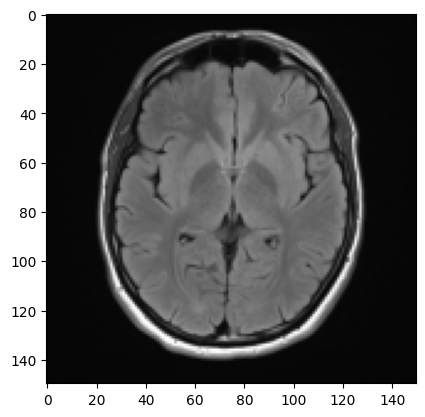

In [ ]:

index_aleatorio= np.random.randint(0,5740)
print("index_aleatorio:", index_aleatorio)
print("datos_desde_archivo", datos_train_desde_archivo['x'].shape)
print("clasificacion_desde_archivo",datos_train_desde_archivo['y'][index_aleatorio])
plt.imshow(datos_train_desde_archivo['x'][index_aleatorio])

print("X_entrenamiento",X_entrenamiento.shape)
#x_reshaped = rgb_image = np.repeat(X_entrenamiento[:, :, :, np.newaxis], 3, axis=3)
#print("x_reshaped",x_reshaped.shape)
print("clasificacion_desde_datos",y_entrenamiento[index_aleatorio])
#plt.imshow(X_entrenamiento[index_aleatorio])

index_aleatorio: 1931
datos_desde_archivo (5740, 150, 150, 3)
clasificacion_desde_archivo no_tumor
X_entrenamiento (5740, 150, 150, 3)
clasificacion_desde_datos no_tumor


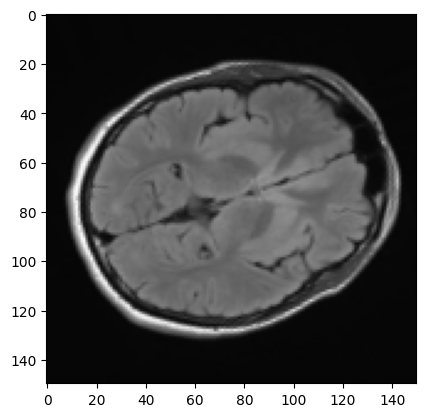

In [ ]:

index_aleatorio= np.random.randint(0,2870)
#index_aleatorio= 1931
print("index_aleatorio:", index_aleatorio)
print("datos_desde_archivo", datos_train_desde_archivo['x'].shape)
print("clasificacion_desde_archivo",datos_train_desde_archivo['y'][index_aleatorio])
plt.imshow(datos_train_desde_archivo['x'][index_aleatorio])

print("X_entrenamiento",X_entrenamiento.shape)
#x_reshaped = rgb_image = np.repeat(X_entrenamiento[:, :, :, np.newaxis], 3, axis=3)
#print("x_reshaped",x_reshaped.shape)
print("clasificacion_desde_datos",y_entrenamiento[index_aleatorio])
#plt.imshow(X_entrenamiento[index_aleatorio])

index_aleatorio: 240
datos_prueba_desde_archivo (788, 150, 150, 3)
clasificacion_prueba_desde_archivo no_tumor
X_prueba (788, 150, 150, 3)
clasificacion_prueba_desde_datos no_tumor


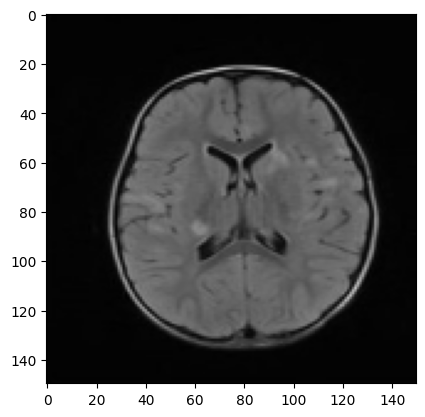

In [ ]:

index_aleatorio= np.random.randint(0,788)
print("index_aleatorio:", index_aleatorio)
print("datos_prueba_desde_archivo", datos_test_desde_archivo['x'].shape)
print("clasificacion_prueba_desde_archivo",datos_test_desde_archivo['y'][index_aleatorio])
plt.imshow(datos_test_desde_archivo['x'][index_aleatorio])

print("X_prueba",X_prueba.shape)
#x_reshaped = rgb_image = np.repeat(X_entrenamiento[:, :, :, np.newaxis], 3, axis=3)
#print("x_reshaped",x_reshaped.shape)
print("clasificacion_prueba_desde_datos",y_prueba[index_aleatorio])
#plt.imshow(X_entrenamiento[index_aleatorio])

index_aleatorio: 241
datos_prueba_desde_archivo (788, 150, 150, 3)
clasificacion_prueba_desde_archivo no_tumor
X_prueba (788, 150, 150, 3)
clasificacion_prueba_desde_datos no_tumor


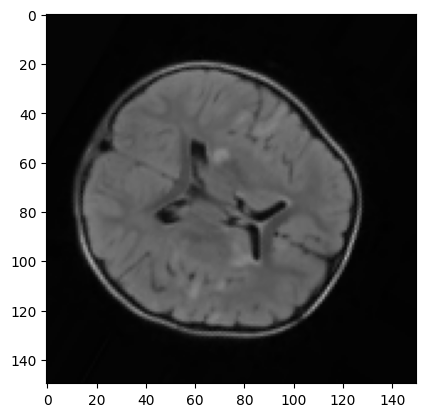

In [ ]:
#index_aleatorio= np.random.randint(0,788)
index_aleatorio= 241
print("index_aleatorio:", index_aleatorio)
print("datos_prueba_desde_archivo", datos_test_desde_archivo['x'].shape)
print("clasificacion_prueba_desde_archivo",datos_test_desde_archivo['y'][index_aleatorio])
plt.imshow(datos_test_desde_archivo['x'][index_aleatorio])

print("X_prueba",X_prueba.shape)
#x_reshaped = rgb_image = np.repeat(X_entrenamiento[:, :, :, np.newaxis], 3, axis=3)
#print("x_reshaped",x_reshaped.shape)
print("clasificacion_prueba_desde_datos",y_prueba[index_aleatorio])
#plt.imshow(X_entrenamiento[index_aleatorio])